<h3>$\color{dark}{\text{Macroeconomía III}}$</h3>

<h4>$\color{dark}{\text{PD #1}}$</h4>
<h4>$\color{dark}{\text{Problema 3}} \ (\color{#F21960}{\text{Coding Task - Soluciones}})$</h4>

<h1><center>$\color{darkblue}{\text{Replicación de los Hechos Estilizados}}$</center></h1>

<h3><center>$\color{darkblue}{\text{Documentación}}$ <br> $\color{darkblue}{\text{_____________________}}$ </center></h3>

<div style="font-family: Times New Roman; text-align: center; color:darkblue"> Jason Cruz  <br> <a href="mailto:jjcruzampa@gmail.com" style="color: blue">jj.cruza@alum.up.edu.pe</a> </div> <br> <div style="font-family: Times New Roman; text-align: center; color:darkblue"> Kevin Risco <br> <a href="mailto:jjcruzampa@gmail.com" style="color: blue">ko.riscos@alum.up.edu.pe</a> </div>

<div style="font-family: Times New Roman; text-align: left; color:dark"> Este <i>Notebook</i> contiene la documentación para la replicación de los Hechos Estilizados (HE) de <a href="https://link.springer.com/chapter/10.1007/978-1-349-08452-4_10" style="color: blue">Kaldor (1963)</a> para el crecimiento económico. Estamos interesados en explorar la data para analizar las principales variables macro y los grandes ratios, y contrastar con capítulos como el de introducción de "Economic Growth" de Barro & Sala-i-Martin quienes hacen un tratamiento especial de estas cuestiones.<div/>

<div style="font-family: Times New Roman; text-align: left; color:dark"> Consulte todo lo que necesita saber (documentación, proyectos, investigación, recursos, etc.) sobre <i>Penn World Tables (PWT)</i> <a href="https://www.rug.nl/ggdc/productivity/pwt/?lang=en" style="color: blue">aquí</a>. Visite principalmente esta <a href="https://www.rug.nl/ggdc/docs/pwt100-user-guide-to-data-files.pdf" style="color: blue">guía de usuario</a> y este <a href="https://www.rug.nl/ggdc/productivity/pwt/related-research-papers/the_next_generation_of_the_penn_world_table.pdf" style="color: blue"><i>paper</i></a>.

<h2><b>$\color{darkblue}{\text{0.}}$</b> $\color{black}{\text{Librerías}}$</h2>

In [1]:
from urllib.request import urlopen # para acceder a sitios web (en especial, al sitio web de PWT).
from bs4 import BeautifulSoup # para web scraping.
import numpy as np # usual (arrays y matrices, funciones matemáticas).
import pandas as pd # usual (data frames).
import matplotlib.pyplot as plt # gráficos.
import matplotlib as mpl # estilo de gráficos.
get_ipython().run_line_magic('matplotlib', 'inline') # estilo de gráficos.
import seaborn as sns # estilo de gráficos.
sns.set() # "seteando" seaborn.
import os # para trabajos de rutas.

<div style="font-family: Times New Roman; text-align: left; color:dark"> Usted puede ver más sobre <i>web scraping</i>  en  <a href="https://python-adv-web-apps.readthedocs.io/en/latest/scraping.html" style="color: blue"> <i>esta</i></a> interesante documentación.<div/>

<h2><b>$\color{darkblue}{\text{1.}}$</b> $\color{black}{\text{Configuraciones Inciales}}$</h2>

<div style="font-family: Times New Roman; text-align: left; color:dark"> Las siguientes 2 líneas crearan carpetas en su ruta actual, llámelas para exportar sus resultados como se hará más abajo. <div/>

In [2]:
out_dir_1 = 'output' # folder para data exportada (.csv).
if not os.path.exists(out_dir_1):
    os.mkdir(out_dir_1)

In [3]:
out_dir_2 = 'graphs' # folder para guardar gráficos.
if not os.path.exists(out_dir_2):
    os.mkdir(out_dir_2)

<h2> <b>$\color{darkblue}{\text{2.}}$</b> $\color{black}{\textit{PWT - Parsing}}$ </h2>

<div style="font-family: Times New Roman; text-align: left; color:dark"> Enlace de descarga del archivo excel de PWT. <div/>

In [5]:
pwt_excel_url = 'https://dataverse.nl/api/access/datafile/354095'

'https://dataverse.nl/api/access/datafile/354095'

<div style="font-family: Times New Roman; text-align: left; color:dark"> Obtenemos la fuente HTML para ingresar la página de inicio de PWT. <div/>

In [7]:
html = urlopen("https://www.rug.nl/ggdc/productivity/pwt/?lang=en").read() # necesario para scrapear.

<div style="font-family: Times New Roman; text-align: left; color:dark"> Definimos el parsing del HTML. <div/>

In [10]:
soup = BeautifulSoup(html, 'html.parser')

<div style="font-family: Times New Roman; text-align: left; color:dark"> Encontramos el string "título" para obtener la versión más reciente de PWT. <div/>

In [7]:
title = soup.find('title').string # Cada vez que visite la página de PWT extraerá la última versión.
title

'PWT 10.01 | Penn World Table | Groningen Growth and Development Centre | University of Groningen'

In [8]:
# Escrapeamos la versión
try:
    float(title.string.split(' ')[1])
    pwt_version = title.string.split(' ')[1]
    print('La versión actual es: ' + pwt_version)
except:
    print('Automatic PWT version identification failed.')

La versión actual es: 10.01


<div style="font-family: Times New Roman; text-align: left; color:dark"> <b> Importamos el dataset. </b> <div/>

In [9]:
# Establecemos el valor actual del archivo de datos PWT
current_pwt_file = 'pwt_'+pwt_version.replace('.','_')+'.xlsx'
current_pwt_file

'pwt_10_01.xlsx'

In [10]:
# Importamos el dataset de una fuente local
if os.path.exists('../xslx/'+current_pwt_file):
    info = pd.read_excel('../xslx/'+current_pwt_file,sheet_name='Info',header=None)
    legend = pd.read_excel('../xslx/'+current_pwt_file,sheet_name='Legend',index_col=0)
    pwt = pd.read_excel('../xslx/'+current_pwt_file,sheet_name='Data',index_col=3,parse_dates=True)

else:
    info = pd.read_excel(pwt_excel_url,sheet_name='Info',header=None)
    legend = pd.read_excel(pwt_excel_url,sheet_name='Legend',index_col=0)
    pwt = pd.read_excel(pwt_excel_url,sheet_name='Data',index_col=3,parse_dates=True)

<div style="font-family: Times New Roman; text-align: left; color:dark"> Creamos un archivo .csv con información relevante de PWT. <div/>

In [11]:
version = info.iloc[0][0].split(' ')[-1]
base_year = legend.loc['rgdpe']['Variable definition'].split(' ')[-1].split('US')[0] # año base para las variables en términos reales.
final_year = pwt[pwt['countrycode']=='USA'].sort_index().index[-1].year # último año con el que contamos en la data.

In [12]:
# Exportamos el archivo
metadata = pd.Series(dtype=str,name='Values')
metadata['version'] = version
metadata['base_year'] = base_year
metadata['final_year'] = final_year
metadata['gdp_per_capita_units'] = base_year+' dollars per person'

metadata.to_csv(f"{out_dir_1}/{'pwt_metadata.csv'}")

<div style="font-family: Times New Roman; text-align: left; color:dark"> Creamos un índice jerárquico. <div/>

In [13]:
pwt = pwt.set_index(['country', pwt.index]) # útil para determinar las unidades id (país-año) y para la visualización de los HE.
pwt.head(5)

countrycode   currency_unit  rgdpe  rgdpo  pop  emp  avh  \
country year                                                                  
Aruba   1950-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1951-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1952-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1953-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   
        1954-01-01         ABW  Aruban Guilder    NaN    NaN  NaN  NaN  NaN   

                    hc  ccon  cda  ...  csh_x  csh_m  csh_r  pl_c  pl_i  pl_g  \
country year                       ...                                          
Aruba   1950-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1951-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1952-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1953-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   
        1954-01-01 NaN   NaN  NaN  ...    NaN    NaN    NaN   NaN   NaN   NaN   

                    pl_x  pl_m  pl_n  pl_k  
country year                                
Aruba   1950-01-01   NaN   NaN   NaN   NaN  
        1951-01-01   NaN   NaN   NaN   NaN  
        1952-01-01   NaN   NaN   NaN   NaN  
        1953-01-01   NaN   NaN   NaN   NaN  
        1954-01-01   NaN   NaN   NaN   NaN  

[5 rows x 50 columns]

<div style="font-family: Times New Roman; text-align: left; color:dark"> Descripción de la data. <div/>

In [14]:
pwt.describe()

,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,...,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
count,1.039900e+04,1.039900e+04,10399.000000,9529.000000,3492.000000,8637.000000,1.039900e+04,1.039900e+04,1.039900e+04,1.039500e+04,...,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10399.000000,10314.000000,7090.000000
mean,3.048523e+05,3.070802e+05,30.962982,14.171167,1986.923200,2.087200,2.249465e+05,3.049463e+05,3.061396e+05,3.061624e+05,...,0.229317,-0.300829,0.017791,0.370850,0.423964,0.345635,0.409820,0.403422,0.364398,1.417965
std,1.214332e+06,1.218457e+06,116.189454,58.056973,284.003338,0.727413,8.882343e+05,1.236095e+06,1.226056e+06,1.224439e+06,...,0.266793,0.640212,0.216200,0.424091,0.635708,0.408015,0.196283,0.202566,0.435907,2.078080
min,2.036377e+01,2.765232e+01,0.004425,0.001200,1380.607643,1.007038,1.604856e+01,2.176663e+01,2.026185e+01,1.693567e+01,...,-1.937363,-23.237627,-12.568965,0.015589,0.006002,0.009270,0.007354,0.020806,0.014431,0.067465
25%,6.801782e+03,7.191773e+03,1.579663,0.775101,1788.478805,1.450483,5.892980e+03,7.194495e+03,6.689781e+03,6.811935e+03,...,0.067027,-0.379584,-0.025204,0.171226,0.191958,0.116110,0.237652,0.240777,0.171785,0.691959
50%,3.031913e+04,3.084435e+04,6.150688,2.856044,1972.355973,1.987572,2.465417e+04,3.134864e+04,3.031841e+04,3.049679e+04,...,0.140116,-0.200254,0.000326,0.306258,0.377943,0.244554,0.443856,0.452949,0.300982,1.000000
75%,1.559740e+05,1.587386e+05,19.934229,8.266107,2168.035042,2.674011,1.133967e+05,1.532297e+05,1.559242e+05,1.559250e+05,...,0.300332,-0.102694,0.044529,0.484549,0.557087,0.452951,0.557034,0.541063,0.453684,1.511751
max,2.086051e+07,2.059584e+07,1433.783686,799.306641,3039.794005,4.351568,1.682624e+07,2.138355e+07,2.079136e+07,2.056603e+07,...,3.523480,32.874020,7.598285,23.122841,34.444988,18.420809,2.056070,4.990355,20.694918,34.340618


In [15]:
pwt.columns

Index(['countrycode', 'currency_unit', 'rgdpe', 'rgdpo', 'pop', 'emp', 'avh',
       'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'cn', 'ck', 'ctfp', 'cwtfp',
       'rgdpna', 'rconna', 'rdana', 'rnna', 'rkna', 'rtfpna', 'rwtfpna',
       'labsh', 'irr', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo', 'i_cig',
       'i_xm', 'i_xr', 'i_outlier', 'i_irr', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_n', 'pl_k'],
      dtype='object')

<div style="font-family: Times New Roman; text-align: left; color:dark"> Construímos una función para obtener las variables en términos por persona y por trabajador. <div/>

In [16]:
# Definir una función que construya conjuntos de datos
def create_data_set(year_0, pwt_code, per_capita, per_worker):
    
    year_0 = str(year_0)
    
    if per_capita:
        data = pwt[pwt_code]/pwt['pop']
        
    elif per_worker:
        data = pwt[pwt_code]/pwt['emp']
        
    else:
        data = pwt[pwt_code]
        
    data = data.unstack(level='country').loc[year_0:].dropna(axis=1)
    
    return data

<div style="font-family: Times New Roman; text-align: left; color:dark"> Series de tiempo individuales. <div/>

In [17]:
# Generamos todas las variables involucradas en los HE
gdp_pc = create_data_set(year_0 = 1960, pwt_code ='rgdpe', per_capita = True, per_worker = False)
gdp_pw = create_data_set(year_0 = 1960, pwt_code ='rgdpe', per_capita = False, per_worker = True)
capital_pc = create_data_set(year_0 = 1960, pwt_code = 'cn', per_capita = True, per_worker = False)
capital_pw = create_data_set(year_0 = 1960, pwt_code = 'cn', per_capita = False, per_worker = True)
return_capital = create_data_set(year_0 = 1960, pwt_code = 'irr', per_capita = False, per_worker = False)
consumption_pc = create_data_set(year_0 = 1960, pwt_code = 'ccon', per_capita = True, per_worker = False)
labor_national_income = create_data_set(year_0 = 1960, pwt_code = 'labsh', per_capita = False, per_worker = False)

# Creamos una nueva variable para el ratio del capital físico entre producción
pwt['ratio_k_y'] = (pwt['cn']/pwt['rgdpe']) 
ratio_k_y_pc = create_data_set(year_0 = 1960, pwt_code = 'ratio_k_y', per_capita = True, per_worker = False)

# Creamos dos nuevas variables para las tasas de crecimiento
pwt['pbi_pc'] = (pwt['rgdpe']/pwt['pop'])
pwt['pbi_pw'] = (pwt['rgdpe']/pwt['emp'])
pwt['growth_rate_pbi_pc'] = pwt['pbi_pc'].pct_change(periods=1) * 100 # tasa de crcimiento del PBI pc
pwt['growth_rate_pbi_pw'] = pwt['pbi_pc'].pct_change(periods=1) * 100 # tasa de crcimiento del PBI pw
growth_rate_gdp_pc = create_data_set(year_0 = 1960, pwt_code = 'growth_rate_pbi_pc', per_capita = False, per_worker = False)
growth_rate_gdp_pw = create_data_set(year_0 = 1960, pwt_code = 'growth_rate_pbi_pw', per_capita = False, per_worker = False)

In [18]:
# Calculamos nuevas variables en logaritmos

pwt['log_pbi_pc'] = np.log2(pwt['pbi_pc'])
pwt['log_pbi_pw'] = np.log2(pwt['pbi_pw'])
log_gdp_pc = create_data_set(year_0 = 1960, pwt_code = 'log_pbi_pc', per_capita = False, per_worker = False)
log_gdp_pw = create_data_set(year_0 = 1960, pwt_code = 'log_pbi_pw', per_capita = False, per_worker = False)

In [19]:
# Encontramos la intersección de países con datos de 1960
intersection = gdp_pc.columns.intersection(gdp_pw.columns)\
.intersection(growth_rate_gdp_pc.columns).intersection(growth_rate_gdp_pw.columns)\
.intersection(log_gdp_pc.columns).intersection(log_gdp_pw.columns)\
.intersection(capital_pc.columns).intersection(capital_pw.columns)\
.intersection(return_capital.columns).intersection(consumption_pc.columns)\
.intersection(labor_national_income.columns).intersection(ratio_k_y_pc.columns)

# Ajustamos la data
gdp_pc = gdp_pc[intersection]
gdp_pw = gdp_pw[intersection]
growth_rate_gdp_pc = growth_rate_gdp_pc[intersection]
growth_rate_gdp_pw = growth_rate_gdp_pw[intersection]
log_gdp_pc = log_gdp_pc[intersection]
log_gdp_pw = log_gdp_pw[intersection]
capital_pc = capital_pc[intersection]
capital_pw = capital_pw[intersection]
return_capital = return_capital[intersection]
consumption_pc = consumption_pc[intersection]
labor_national_income = labor_national_income[intersection]
ratio_k_y_pc = ratio_k_y_pc[intersection]

# Exportamos a .csv
gdp_pc.to_csv(f"{out_dir_1}/{'gdp_pc.csv'}")
gdp_pw.to_csv(f"{out_dir_1}/{'gdp_pw.csv'}")
growth_rate_gdp_pc.to_csv(f"{out_dir_1}/{'growth_rate_gdp_pc.csv'}")
growth_rate_gdp_pw.to_csv(f"{out_dir_1}/{'growth_rate_gdp_pw.csv'}")
log_gdp_pc.to_csv(f"{out_dir_1}/{'log_gdp_pc.csv'}")
log_gdp_pw.to_csv(f"{out_dir_1}/{'log_gdp_pw.csv'}")
capital_pc.to_csv(f"{out_dir_1}/{'capital_pc.csv'}")
capital_pw.to_csv(f"{out_dir_1}/{'capital_pw.csv'}")
return_capital.to_csv(f"{out_dir_1}/{'return_capital.csv'}")
consumption_pc.to_csv(f"{out_dir_1}/{'consumption_pc.csv'}")
labor_national_income.to_csv(f"{out_dir_1}/{'labor_national_income.csv'}")
ratio_k_y_pc.to_csv(f"{out_dir_1}/{'ratio_k_y_pc.csv'}")

## Análisis y visualización de la data

<h2><b>$\color{darkblue}{\text{3.}}$</b> $\color{black}{\text{Hechos Estilizados de Kaldor (1963)}}$</h2>

<h3><b>$\color{darkblue}{\text{3.1. }}$</b> $\color{black}{\text{La producción per cápita crece en el tiempo y su tasa de crecimiento no es decreciente.}}$</h3>

<div style="font-family: Times New Roman; text-align: left; color:dark"> Producción per cápita. <div/>

In [20]:
df_gdp_pc = pd.read_csv(f"{out_dir_1}/{'gdp_pc.csv'}", index_col = 'year', parse_dates = True)
df_gdp_pc.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,3252.630494,15437.939216,10109.611369,9270.018983,11293.192122,1545.339433,519.469843,2429.154769,900.586156,1562.769789,...,7869.284796,1736.289277,5051.111940,1199.687986,12861.092670,18900.748300,7705.264011,7851.395244,2858.762323,2485.571112
1961-01-01,3353.949600,15473.133028,10639.052414,9612.447342,11737.216193,1595.443348,546.602609,2660.471111,868.797918,1592.887347,...,9048.024834,1852.313517,4998.647316,1181.740036,13104.363941,19068.181067,7713.958737,7718.622952,2713.067569,2547.953859
1962-01-01,3145.833725,16085.577383,10893.577429,10007.940403,12290.966809,1604.521699,578.985449,2750.120053,931.350502,1554.347342,...,8650.320971,1844.890714,5165.759933,1264.679476,13187.817970,19929.942623,7773.475157,7793.094139,2582.095370,2452.915675
1963-01-01,3073.951879,17126.591887,11316.709075,10530.637176,12612.764838,1671.224684,600.909627,2847.978324,897.869032,1637.728554,...,9668.196741,1984.148811,5521.461220,1331.542517,13592.445679,20496.012847,7463.180888,8011.923465,2661.708147,2434.347994
1964-01-01,3232.069949,17551.088332,11799.938402,10177.194147,13416.457116,1766.829266,635.205519,2912.684002,939.889586,1670.618496,...,9838.998520,1963.840822,5630.367014,1484.043186,14308.948818,21400.358562,7707.037661,8533.701579,3031.893674,2297.194039


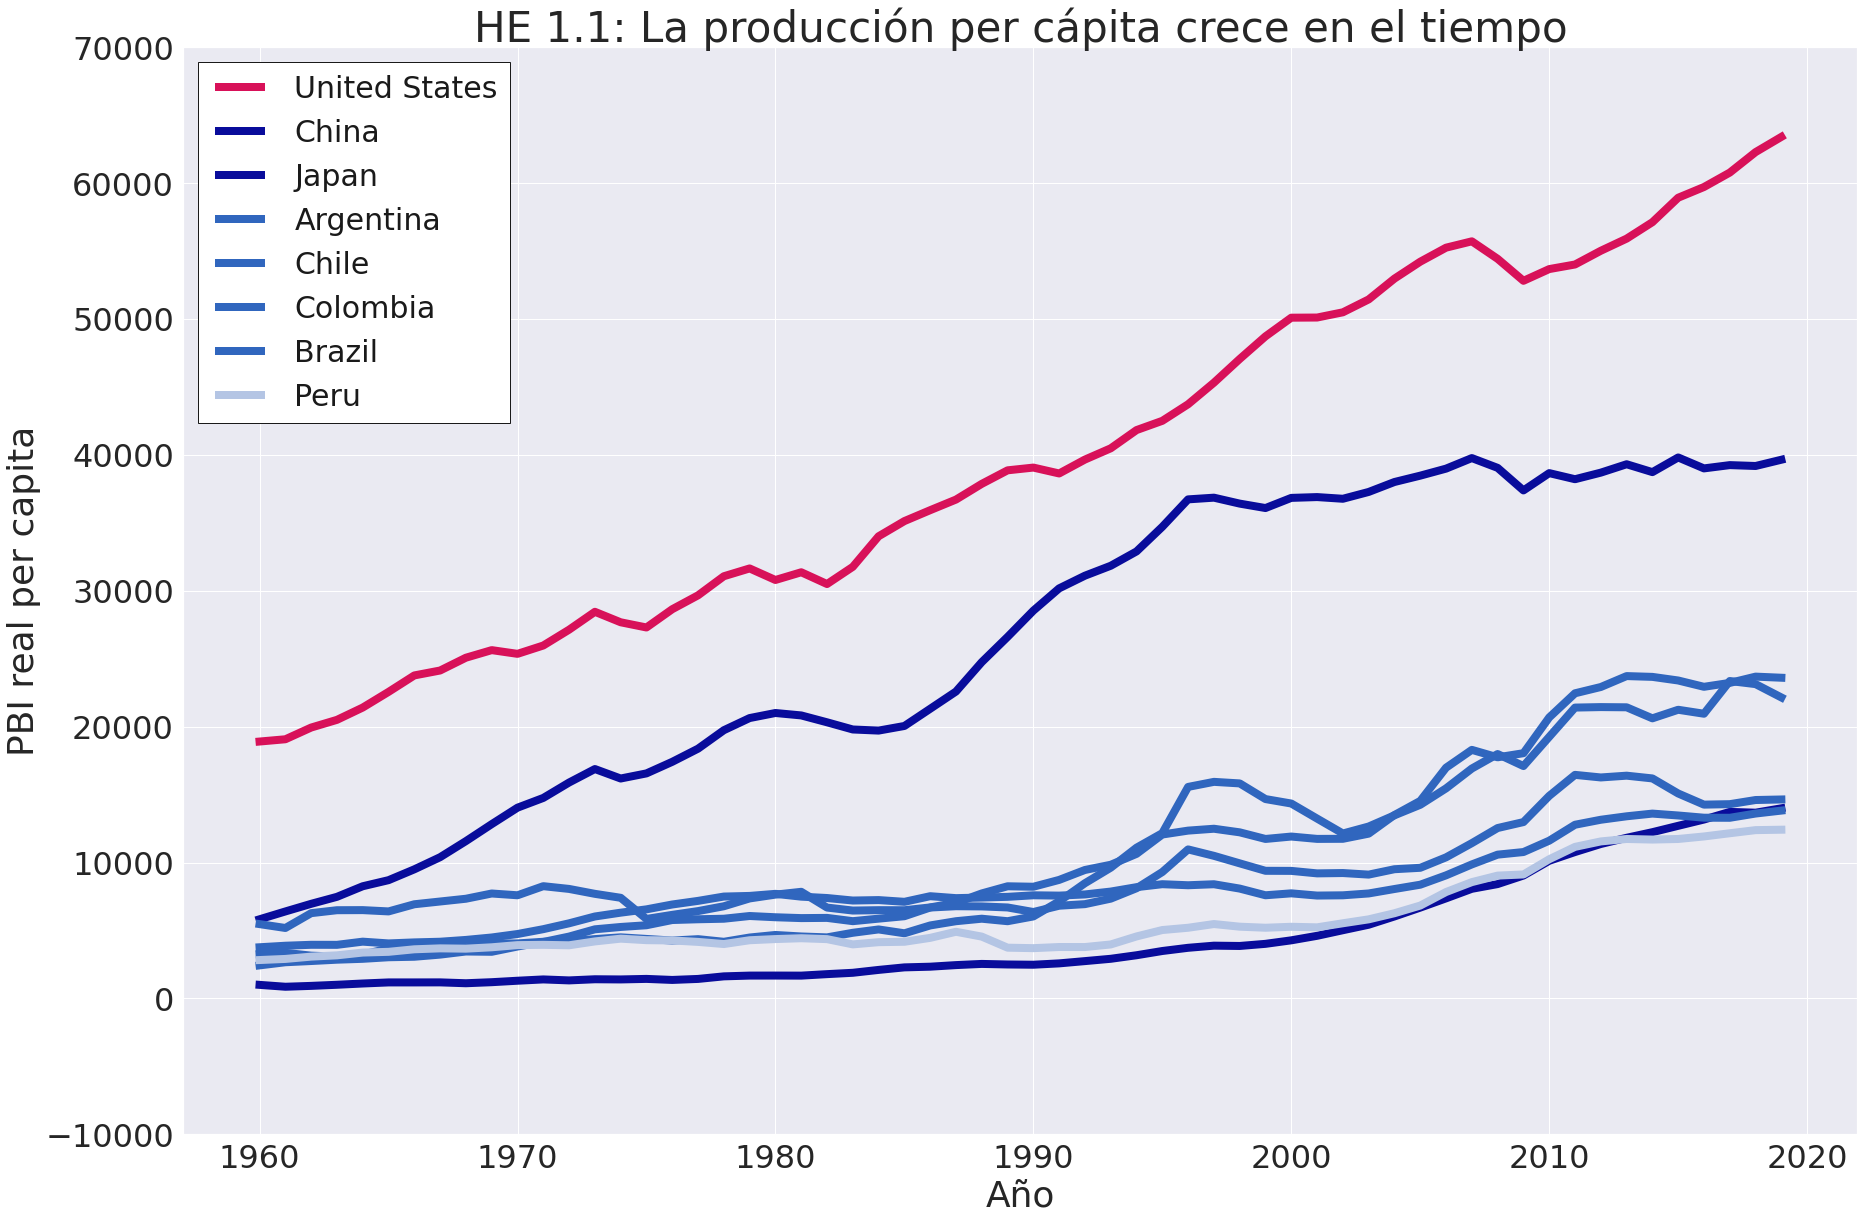

In [21]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 1.1: La producción per cápita crece en el tiempo', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('PBI real per capita', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_gdp_pc['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_gdp_pc['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_gdp_pc['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_gdp_pc['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_gdp_pc['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_gdp_pc['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_gdp_pc['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_gdp_pc['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h1_1.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<div style="font-family: Times New Roman; text-align: left; color:dark"> Tasa de crecimiento de la producción per cápita. <div/>

In [22]:
df_growth_rate_gdp_pc = pd.read_csv(f"{out_dir_1}/{'growth_rate_gdp_pc.csv'}", index_col = 'year', parse_dates = True)
df_growth_rate_gdp_pc.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,5.990686,-1.011414,7.028479,-36.670123,6.214479,3.679203,-95.352132,6.789833,8.460915,-69.406291,...,1.292606,-93.512873,-2.806835,-97.546470,3.886907,1.001022,3.946007,-11.180526,3.607457,2.787376
1961-01-01,3.114990,0.227970,5.237007,3.693934,3.931785,3.242260,5.223165,9.522503,-3.529728,1.927191,...,14.978998,6.682310,-1.038675,-1.496052,1.891529,0.885853,0.112841,-1.691066,-5.096428,2.509795
1962-01-01,-6.205098,3.958115,2.392365,4.114385,4.717904,0.569017,5.924384,3.369664,7.199900,-2.419506,...,-4.395477,-0.400731,3.343157,7.018417,0.636842,4.519369,0.771542,0.964825,-4.827458,-3.729981
1963-01-01,-2.284986,6.471726,3.884230,5.222821,2.618167,4.157188,3.786654,3.558327,-3.594938,5.364387,...,11.766913,7.548311,6.885749,5.286955,3.068193,2.840300,-3.991706,2.807990,3.083262,-0.756964
1964-01-01,5.143804,2.478581,4.270052,-3.356331,6.372055,5.720630,5.707329,2.271986,4.680032,2.008266,...,1.766635,-1.023511,1.972409,11.452933,5.271333,4.412301,3.267464,6.512520,13.907818,-5.634115


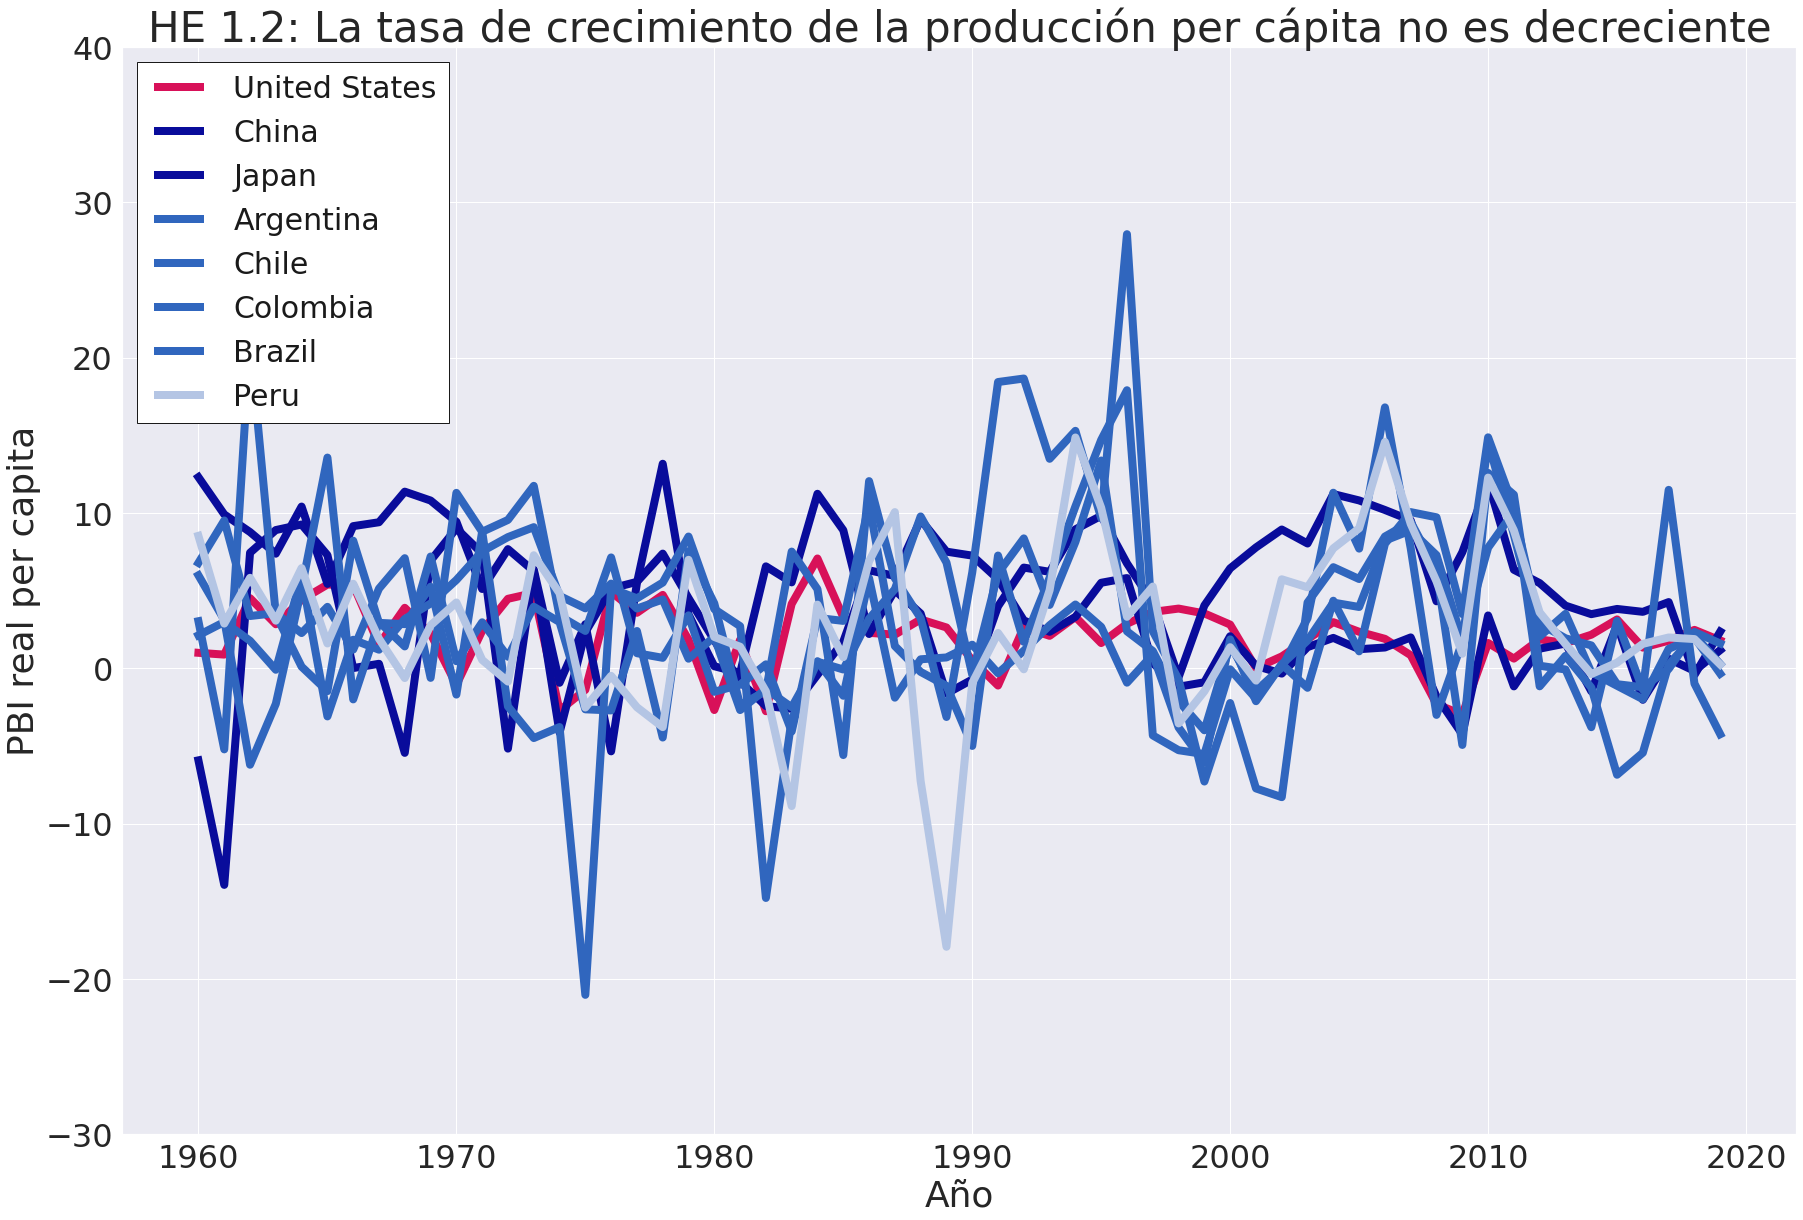

In [23]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 1.2: La tasa de crecimiento de la producción per cápita no es decreciente', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('PBI real per capita', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_growth_rate_gdp_pc['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pc['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h1_2.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

##### Log de la producción per cápita.

In [24]:
df_log_gdp_pc = pd.read_csv(f"{out_dir_1}/{'log_gdp_pc.csv'}", index_col='year', parse_dates = True)
df_log_gdp_pc.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,11.667391,13.914193,13.303440,13.178357,13.463166,10.593708,9.020896,11.246239,9.814720,10.609890,...,12.942017,10.761792,12.302385,10.228444,13.650726,14.206156,12.911629,12.938733,11.481175,11.279362
1961-01-01,11.711645,13.917478,13.377082,13.230688,13.518803,10.639742,9.094349,11.377466,9.762877,10.637429,...,13.143387,10.855113,12.287322,10.206697,13.677760,14.218880,12.913256,12.914128,11.405709,11.315123
1962-01-01,11.619227,13.973480,13.411190,13.288857,13.585311,10.647928,9.177383,11.425279,9.863180,10.602093,...,13.078538,10.849320,12.334765,10.304556,13.686918,14.282650,12.924344,12.927981,11.334327,11.260282
1963-01-01,11.585879,14.063950,13.466167,13.362305,13.622597,10.706690,9.231004,11.475722,9.810361,10.677481,...,13.239031,10.954305,12.430834,10.378883,13.730517,14.323056,12.865575,12.967933,11.378137,11.249320
1964-01-01,11.658243,14.099273,13.526492,13.313052,13.711716,10.786947,9.311080,11.508133,9.876347,10.706167,...,13.264296,10.939462,12.459013,10.535317,13.804630,14.385347,12.911961,13.058956,11.566003,11.165657


<div style="font-family: Times New Roman; text-align: left; color:dark"> Veamos qué ocurre con el log PBI pc. <div/>

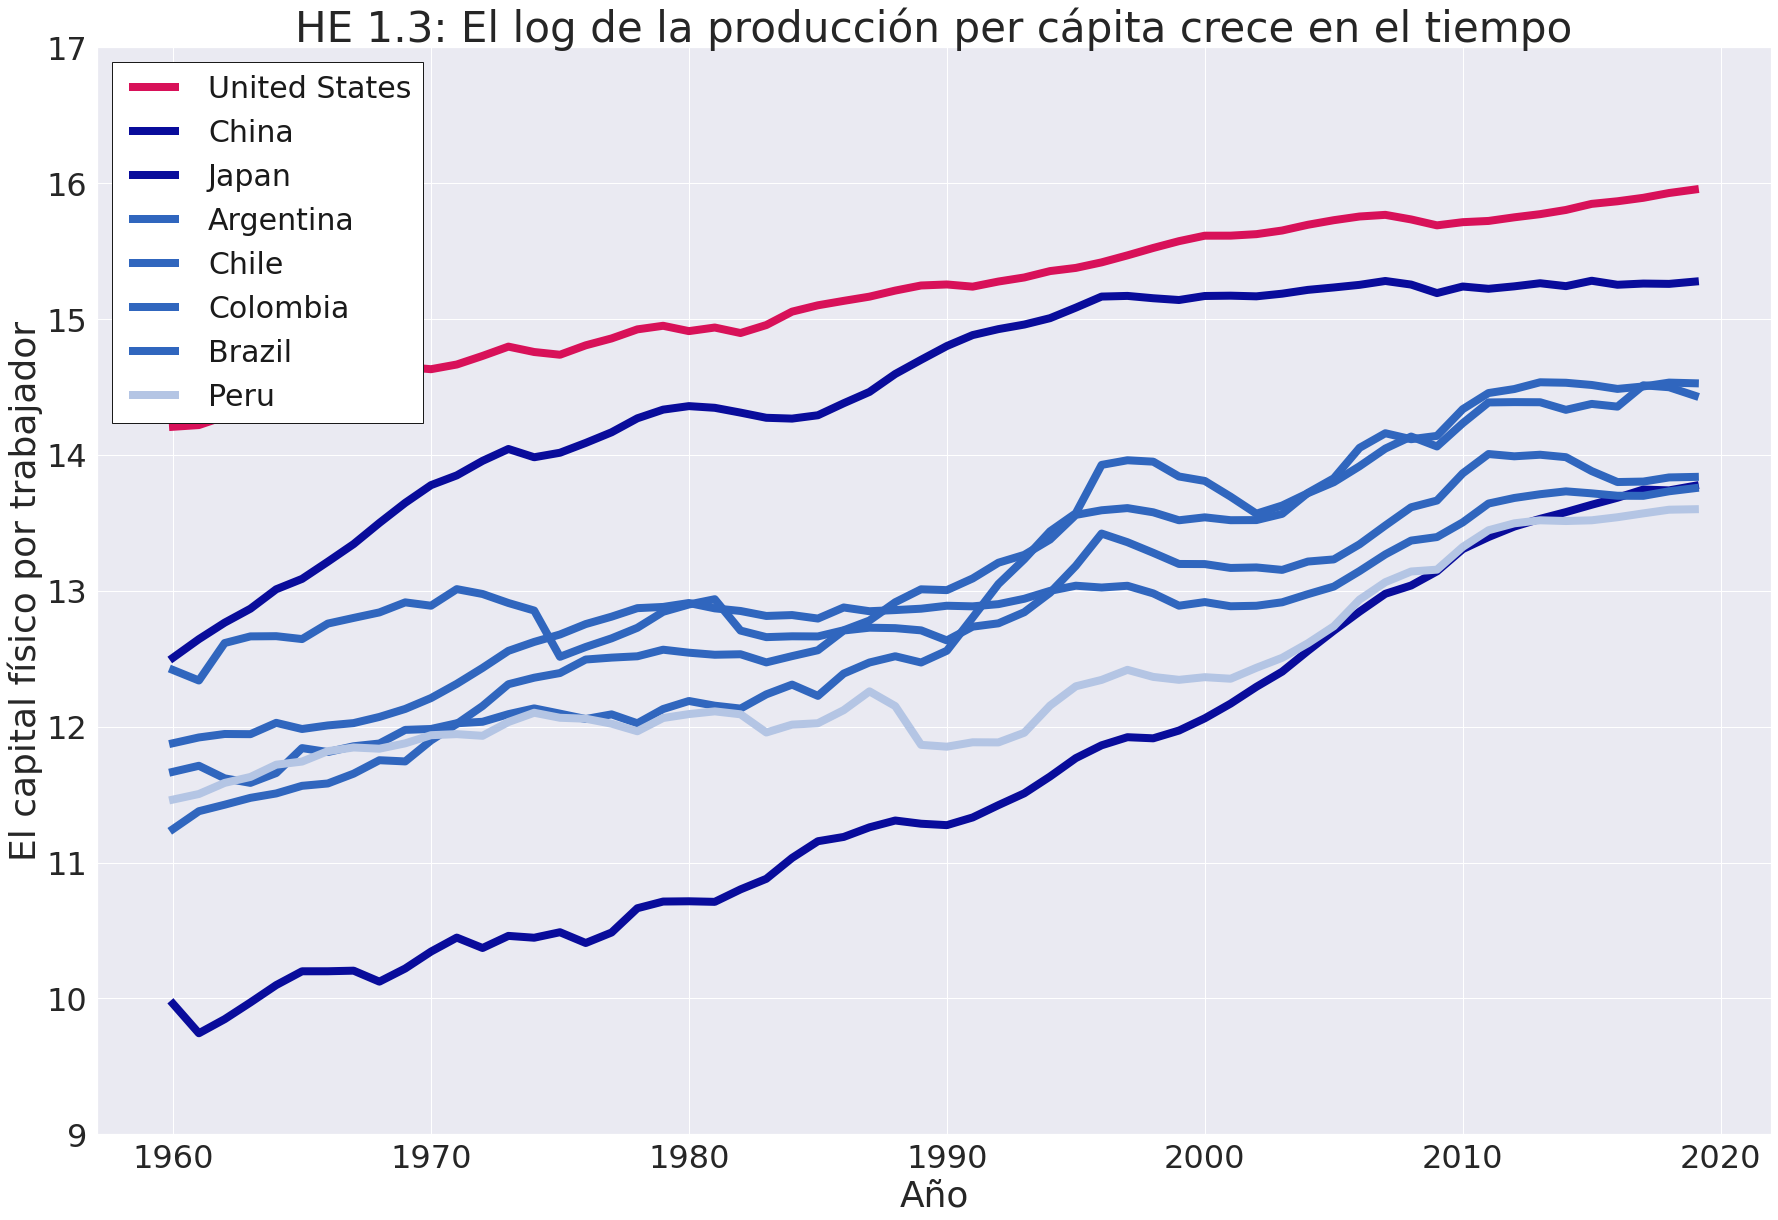

In [25]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 1.3: El log de la producción per cápita crece en el tiempo', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_log_gdp_pc['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_log_gdp_pc['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_log_gdp_pc['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_log_gdp_pc['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_log_gdp_pc['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h2.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<h3><b>$\color{darkblue}{\text{3.2. }}$</b> $\color{black}{\text{El capital físico por trabajador crece en el tiempo.}}$</h3>

In [26]:
df_capital_pw = pd.read_csv(f"{out_dir_1}/{'capital_pw.csv'}", index_col='year', parse_dates = True)
df_capital_pw.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,13550.964569,157783.358515,49957.220885,22351.412178,135606.390155,9459.668666,4070.790295,17123.052612,903.124416,4559.050701,...,32796.593598,11220.259783,27366.592702,4435.865391,87708.883207,207081.140516,35382.924685,78454.514510,15035.728096,8190.881404
1961-01-01,14402.657145,161055.065389,52458.292977,23899.203776,139320.352078,9570.318638,4080.751990,17753.846797,914.381766,4677.975491,...,34339.830321,11336.544416,28766.663822,4412.051204,90992.898643,213872.761784,36832.751023,77944.224116,14894.636677,7873.966628
1962-01-01,14971.599474,163116.152222,55037.990134,25167.532573,142208.742635,10109.128072,4149.614835,18387.850892,932.139034,4801.034583,...,35933.738897,11722.032535,30612.590213,4512.021158,93947.010056,218421.842471,38606.984860,77823.973651,14774.274079,7529.057084
1963-01-01,15252.371208,165588.714143,57682.082917,26241.091314,145933.678290,10508.169451,4259.231049,18752.130361,945.501447,4923.353430,...,37023.800958,12180.183149,32227.890765,4585.209596,97634.047792,223626.280824,38874.778211,77624.357641,14498.793462,7200.809245
1964-01-01,15814.159102,168502.332720,60993.448281,27119.051643,150475.550498,10950.333567,4455.606465,19210.775664,959.538980,5065.475829,...,37591.816300,12707.528846,33838.942243,4813.959576,102366.268342,227495.039717,40963.957146,78989.116891,14115.451880,6922.497511


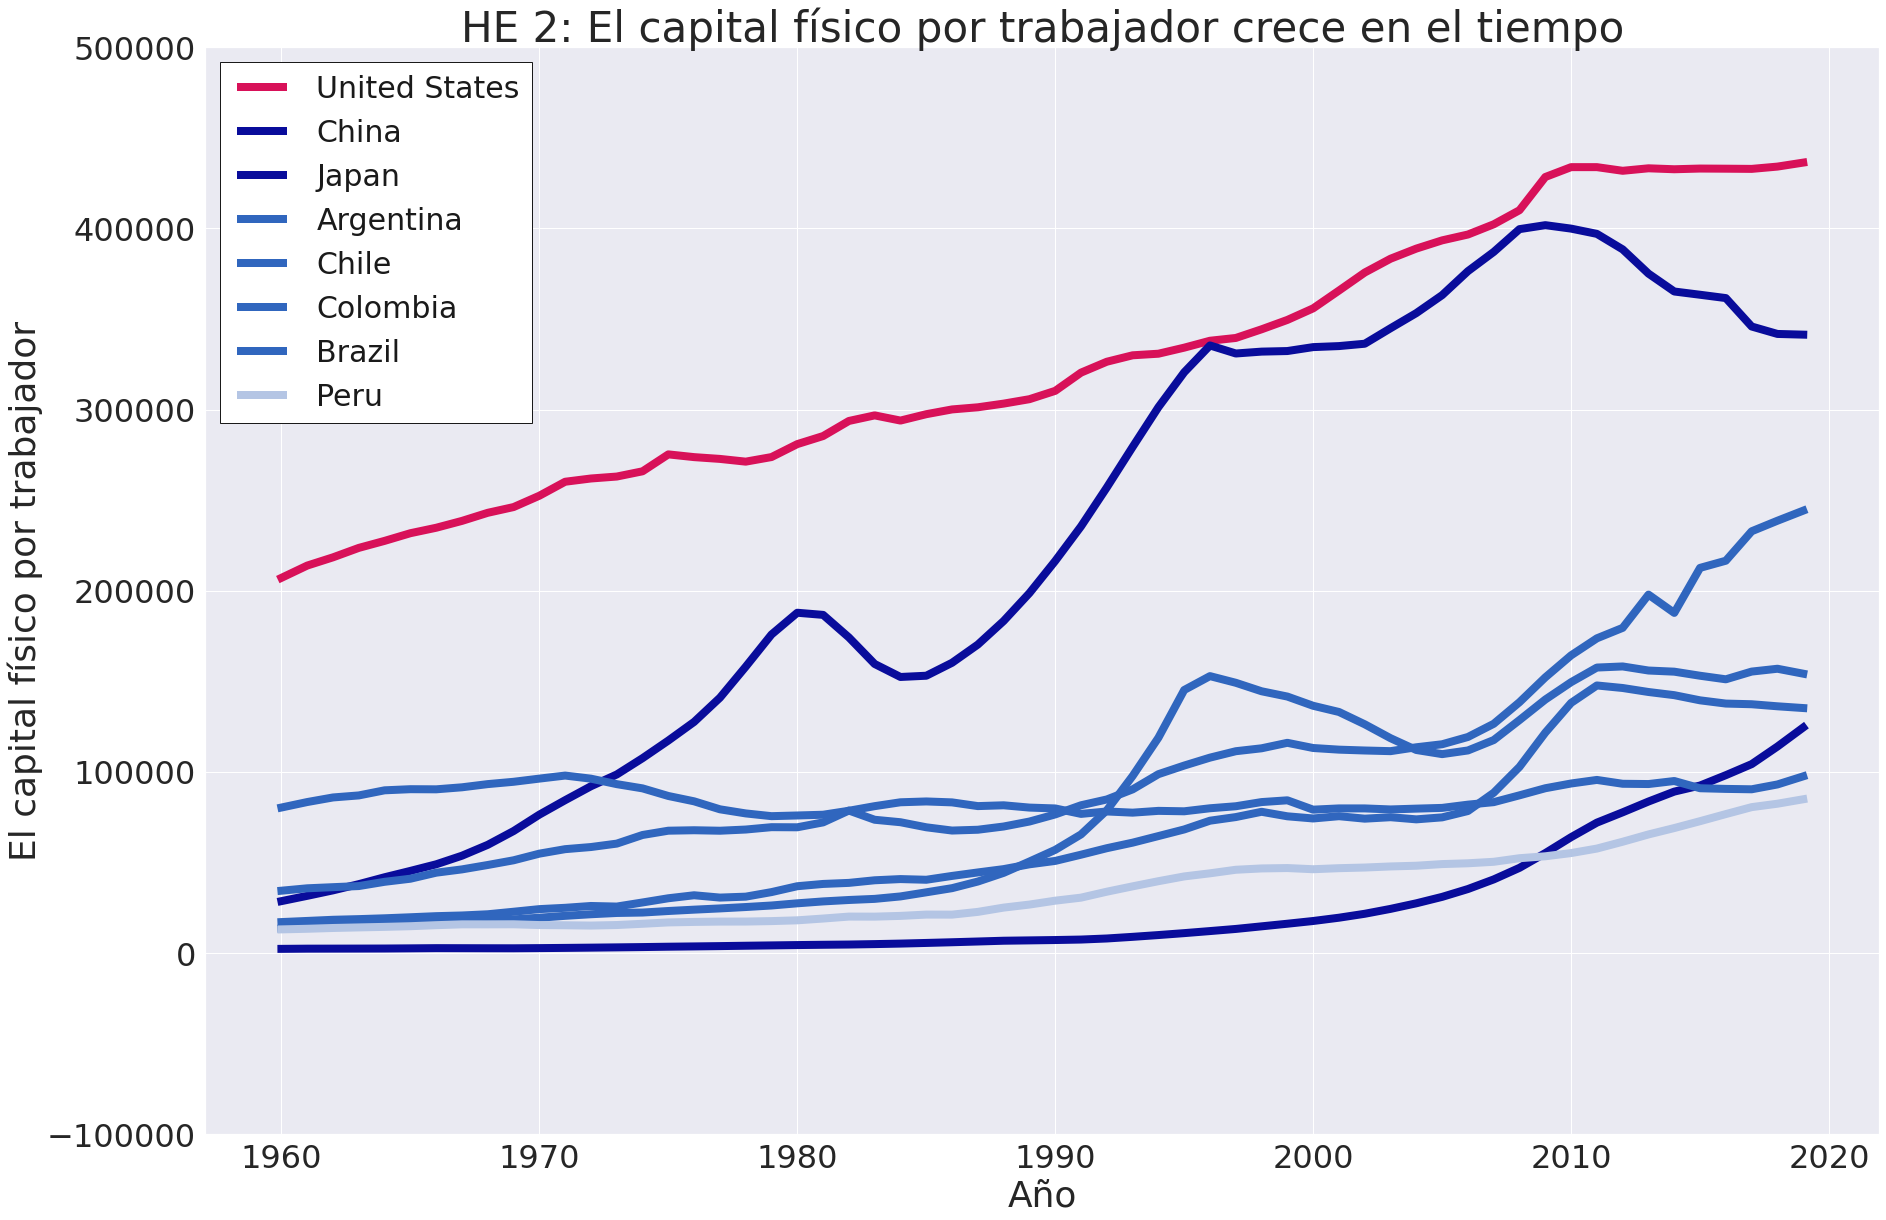

In [27]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 2: El capital físico por trabajador crece en el tiempo', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_capital_pw['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_capital_pw['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_capital_pw['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_capital_pw['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_capital_pw['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h2.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<h3><b>$\color{darkblue}{\text{3.3. }}$</b> $\color{black}{\text{La tasa de rentabilidad del capital es aproximadamente constante.}}$</h3>

In [28]:
df_return_capital = pd.read_csv(f"{out_dir_1}/{'return_capital.csv'}", index_col = 'year', parse_dates=True)
df_return_capital.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.309878,0.037238,0.093719,0.112702,0.077533,0.203515,0.336031,0.235271,0.279191,0.198510,...,0.145814,0.108698,0.424535,0.176052,0.164856,0.080483,0.032682,0.094756,0.054867,0.209216
1961-01-01,0.242340,0.043551,0.091555,0.107520,0.077318,0.223254,0.359287,0.216696,0.351239,0.187241,...,0.149000,0.127364,0.424796,0.180538,0.163911,0.081777,0.030762,0.089637,0.050258,0.228688
1962-01-01,0.275270,0.045510,0.091186,0.118629,0.077246,0.244329,0.385896,0.242669,0.387993,0.176470,...,0.138358,0.115672,0.447222,0.197842,0.163718,0.086841,0.024750,0.098140,0.050919,0.214010
1963-01-01,0.256537,0.050862,0.090535,0.109407,0.075033,0.215116,0.390256,0.208011,0.357166,0.225611,...,0.140889,0.128691,0.463367,0.204392,0.159049,0.089335,0.019647,0.104151,0.049428,0.268657
1964-01-01,0.256566,0.045995,0.095368,0.102025,0.076551,0.223141,0.391000,0.227431,0.327474,0.225789,...,0.138157,0.127633,0.453501,0.227165,0.160172,0.092741,0.020907,0.108074,0.060143,0.266848


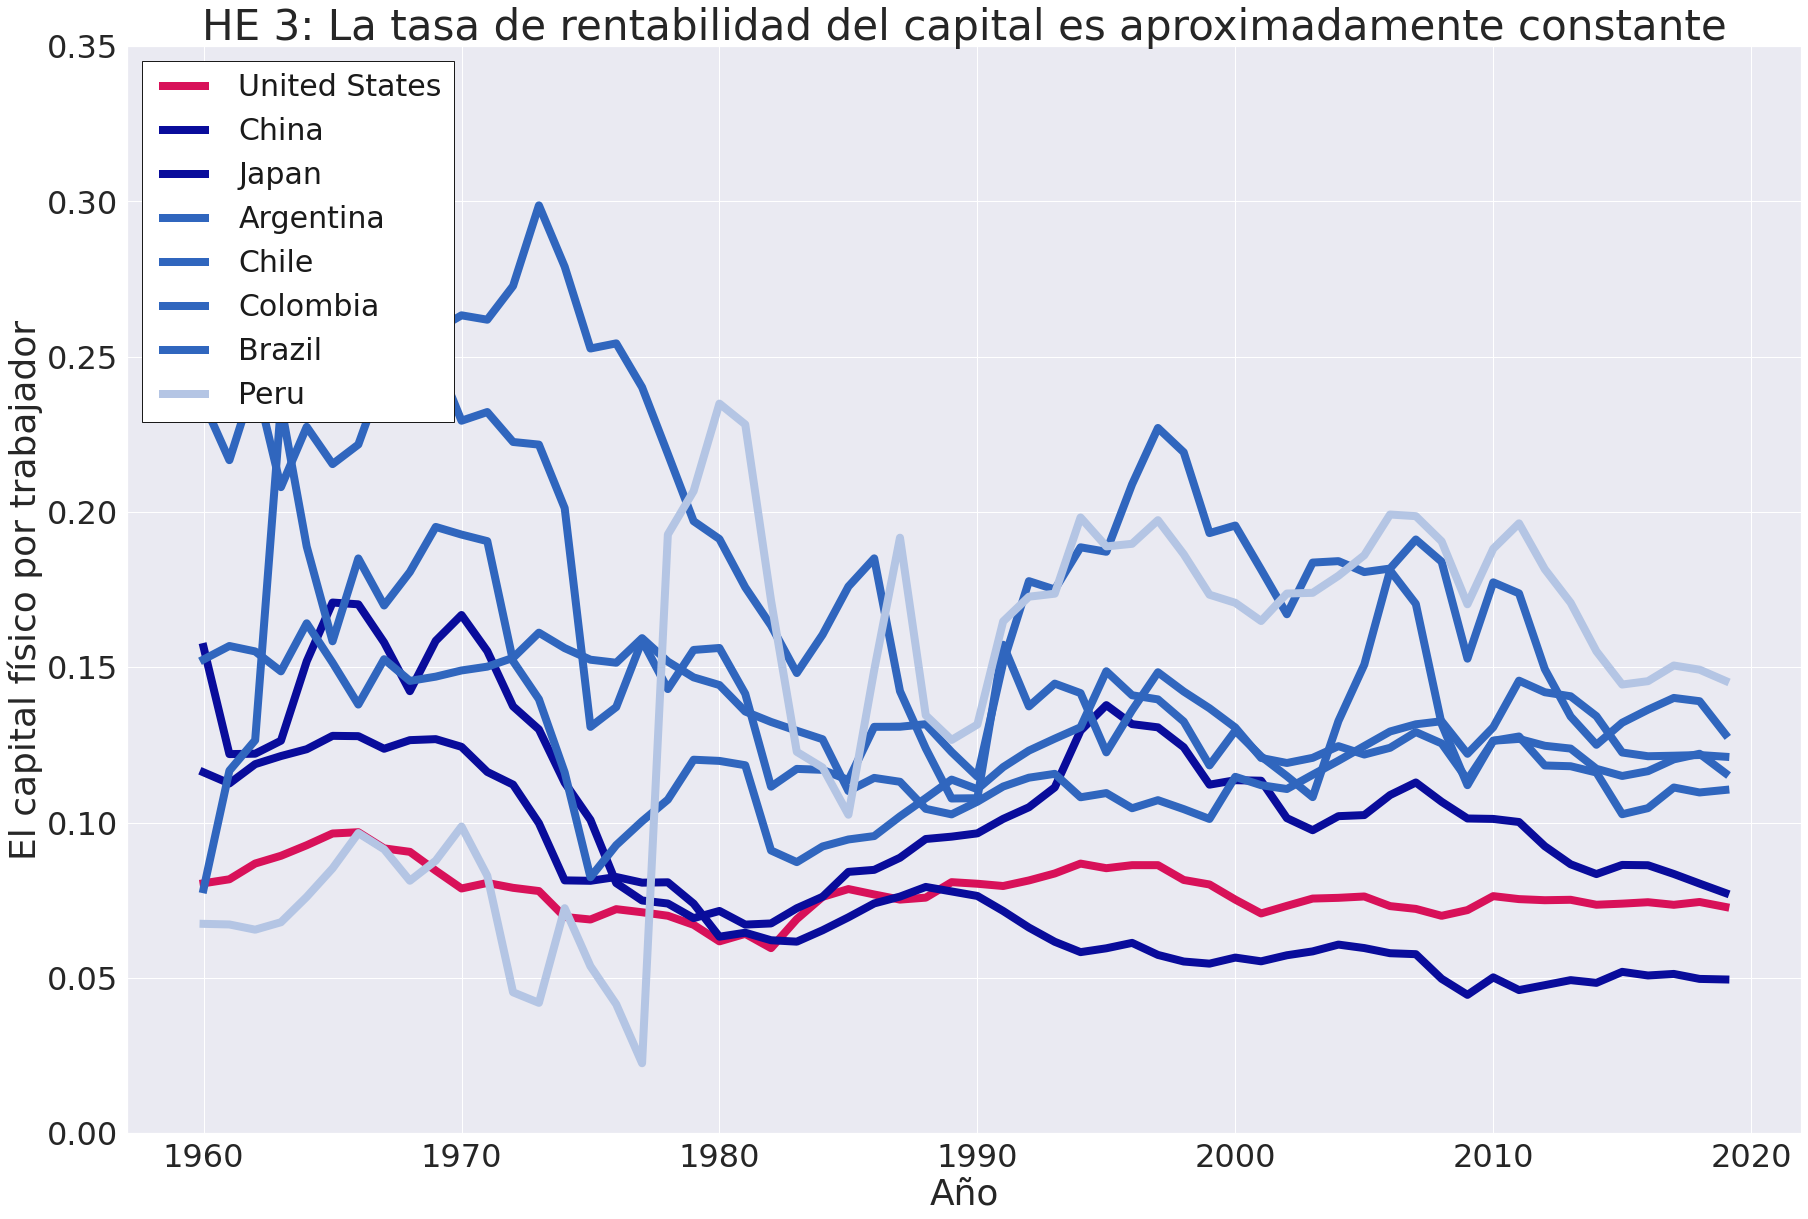

In [29]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 3: La tasa de rentabilidad del capital es aproximadamente constante', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_return_capital['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_return_capital['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_return_capital['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_return_capital['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_return_capital['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h3.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<h3><b>$\color{darkblue}{\text{3.4. }}$</b> $\color{black}{\text{El ratio capital físico entre producción es aproximadamente constante.}}$</h3>

In [30]:
df_ratio_k_y_pc = pd.read_csv(f"{out_dir_1}/{'ratio_k_y_pc.csv'}", index_col = 'year', parse_dates=True)
df_ratio_k_y_pc.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.075432,0.387427,0.337843,3.459266,0.505311,0.754320,4.737744,0.031336,0.102092,0.248208,...,1.557410,0.458625,0.073652,0.157891,0.060128,0.022813,0.684425,0.365854,0.534996,0.385659
1961-01-01,0.076243,0.378162,0.335244,3.609649,0.498095,0.716174,4.392191,0.028635,0.105737,0.244390,...,1.384434,0.423349,0.074764,0.158112,0.060899,0.022609,0.700806,0.352654,0.542790,0.348636
1962-01-01,0.082913,0.363673,0.337738,3.664563,0.487404,0.728554,4.101244,0.027703,0.099143,0.251281,...,1.470187,0.428882,0.072986,0.144648,0.061785,0.021741,0.717418,0.333218,0.550038,0.333468
1963-01-01,0.084867,0.343392,0.334077,3.599895,0.484024,0.703943,3.943358,0.026350,0.102764,0.238966,...,1.329528,0.402827,0.069562,0.133849,0.061599,0.021325,0.740952,0.309308,0.508993,0.309991
1964-01-01,0.082199,0.339695,0.333747,3.807773,0.467398,0.671513,3.792709,0.025502,0.098062,0.235386,...,1.307553,0.412374,0.069247,0.121180,0.061231,0.020668,0.745252,0.283010,0.422652,0.305566


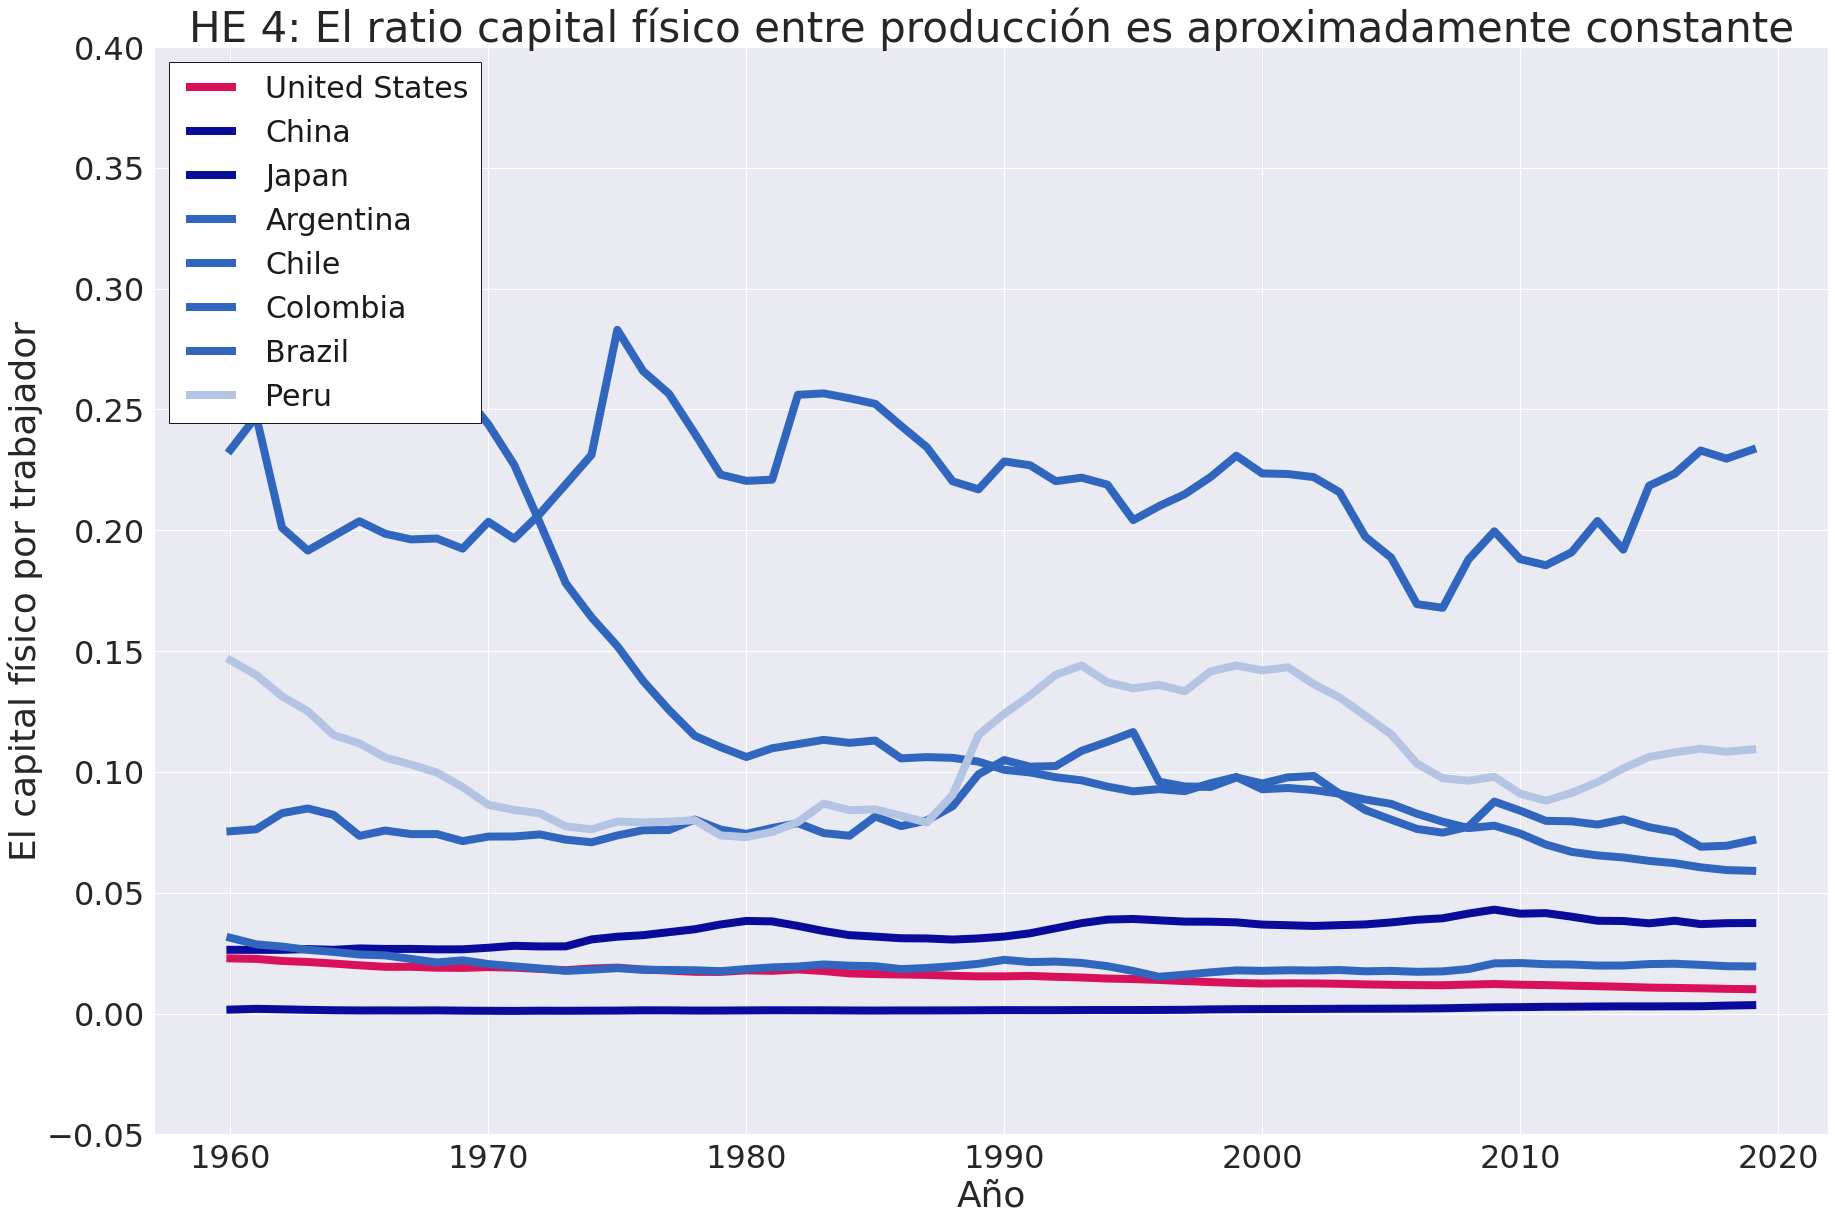

In [31]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 4: El ratio capital físico entre producción es aproximadamente constante', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_ratio_k_y_pc['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_ratio_k_y_pc['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_ratio_k_y_pc['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h4.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<h3><b>$\color{darkblue}{\text{1.5.}}$</b> $\color{black}{\text{Las participaciones del trabajo y capital físico en la renta nacional son aproximadamente constantes.}}$</h3>

In [32]:
df_labor_national_income = pd.read_csv(f"{out_dir_1}/{'labor_national_income.csv'}", index_col = 'year', parse_dates=True)
df_labor_national_income.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,0.441024,0.685819,0.63296,0.733469,0.644635,0.5132,0.349185,0.514606,0.460463,0.555015,...,0.590123,0.551501,0.384998,0.486729,0.551432,0.636742,0.516889,0.422622,0.445721,0.660198
1961-01-01,0.441024,0.680522,0.63296,0.733469,0.644635,0.5132,0.349185,0.514606,0.460463,0.555015,...,0.590123,0.551501,0.384998,0.486729,0.551432,0.633703,0.516889,0.422622,0.445721,0.660198
1962-01-01,0.441024,0.670636,0.63296,0.733469,0.644635,0.5132,0.349185,0.514606,0.460463,0.555015,...,0.590123,0.551501,0.384998,0.486729,0.551432,0.629107,0.516889,0.422622,0.445721,0.660198
1963-01-01,0.441024,0.661701,0.63296,0.733469,0.644635,0.5132,0.349185,0.514606,0.460463,0.555015,...,0.590123,0.551501,0.384998,0.486729,0.551432,0.626385,0.516889,0.422622,0.445721,0.660198
1964-01-01,0.441024,0.668188,0.63296,0.733469,0.644635,0.5132,0.349185,0.514606,0.460463,0.555015,...,0.590123,0.551501,0.384998,0.486729,0.551432,0.624379,0.516889,0.422622,0.445721,0.660198


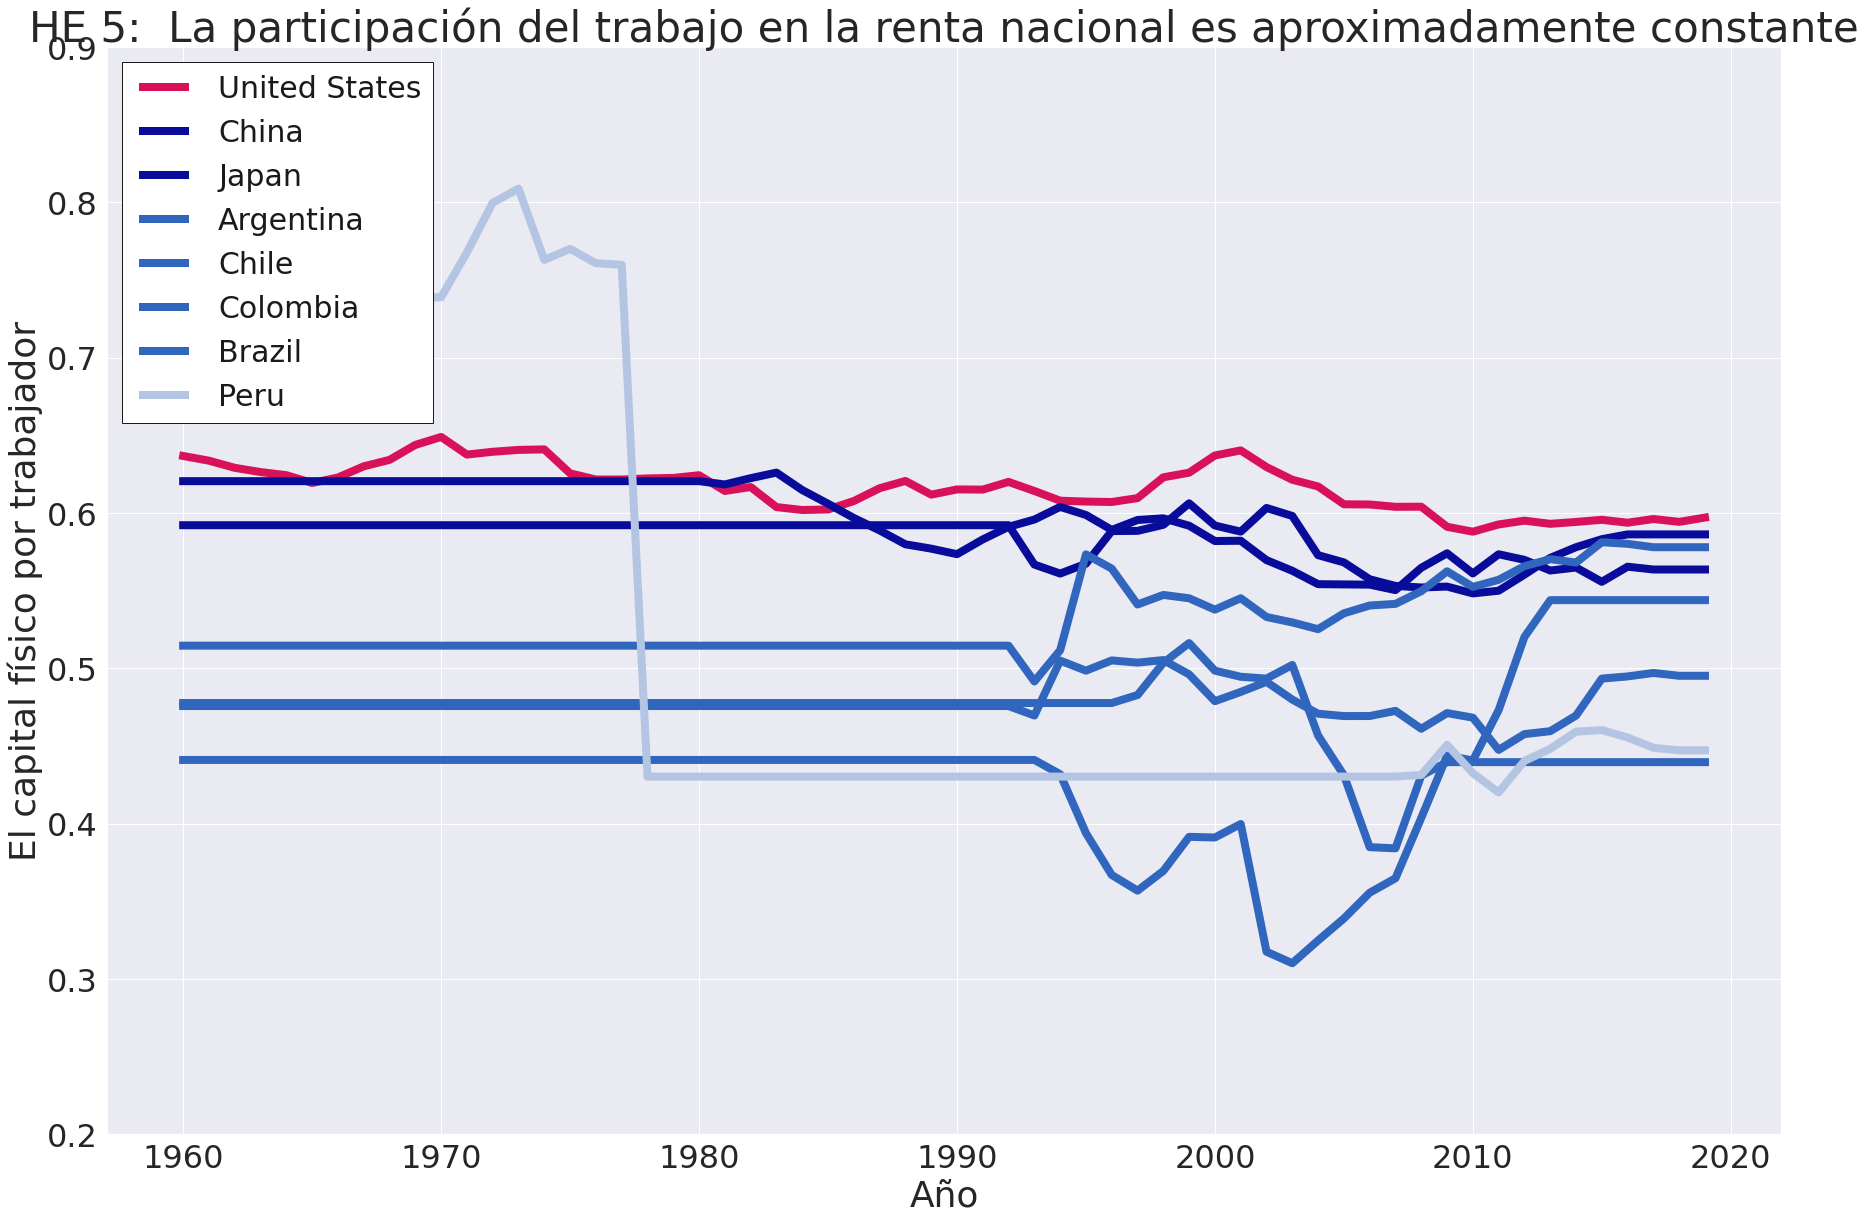

In [33]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 5:  La participación del trabajo en la renta nacional es aproximadamente constante', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_labor_national_income['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_labor_national_income['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_labor_national_income['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_labor_national_income['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_labor_national_income['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h5.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()

<h3><b>$\color{darkblue}{\text{1.6. }}$</b> $\color{black}{\text{La tasa de crecimiento de la producción por trabajador es muy distinta en los distintos países.}}$</h3>

In [34]:
df_gdp_pw = pd.read_csv(f"{out_dir_1}/{'gdp_pw.csv'}", index_col = 'year', parse_dates=True)
df_gdp_pw.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,8743.628700,38897.682700,20845.033930,27793.571163,29447.036559,3539.615231,1609.410682,7667.421889,1714.334787,3378.812119,...,25290.562921,5947.947230,13501.064408,2793.248225,27882.220671,49172.269335,20526.677523,26788.922981,8786.801551,5520.680184
1961-01-01,9047.485768,39765.336614,21937.334775,28820.246126,30534.122342,3687.243922,1713.066472,8447.712613,1667.337330,3465.260375,...,29089.319750,6395.207833,13589.342966,2696.632531,28324.664156,50401.723374,20601.139879,26585.788068,8365.963247,5687.472514
1962-01-01,8513.002068,41117.857927,22706.579016,30006.023274,31669.020226,3742.222392,1835.795094,8781.336847,1802.109570,3402.494216,...,27820.739995,6419.965265,14436.321976,2928.822013,28562.472119,52711.731383,20812.041836,27073.547787,7987.938935,5502.785442
1963-01-01,8342.602481,43376.503181,23904.170467,31573.184336,32497.404035,3934.287531,1927.876777,9141.401945,1751.756821,3607.502345,...,31105.601166,6959.616171,15569.527403,3124.074979,29587.941019,54233.813035,20031.416607,28054.691235,8261.037550,5488.651935
1964-01-01,8795.170003,43757.793105,25133.352641,30513.483604,34389.981651,4199.145447,2062.333420,9394.462650,1849.100402,3703.176542,...,31435.560141,6943.748806,16044.633017,3517.045750,30996.959006,56139.423808,20737.964244,30103.747810,9440.707812,5205.648870


<div style="font-family: Times New Roman; text-align: left; color:dark"> Tasa de crecimiento de la producción por trabajador. <div/>

In [35]:
df_growth_rate_gdp_pw = pd.read_csv(f"{out_dir_1}/{'growth_rate_gdp_pw.csv'}", index_col = 'year', parse_dates = True)
df_growth_rate_gdp_pw.head(5)

,Argentina,Australia,Austria,Barbados,Belgium,Bolivia (Plurinational State of),Botswana,Brazil,Burkina Faso,Cameroon,...,Trinidad and Tobago,Tunisia,Turkey,U.R. of Tanzania: Mainland,United Kingdom,United States,Uruguay,Venezuela (Bolivarian Republic of),Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1960-01-01,5.990686,-1.011414,7.028479,-36.670123,6.214479,3.679203,-95.352132,6.789833,8.460915,-69.406291,...,1.292606,-93.512873,-2.806835,-97.546470,3.886907,1.001022,3.946007,-11.180526,3.607457,2.787376
1961-01-01,3.114990,0.227970,5.237007,3.693934,3.931785,3.242260,5.223165,9.522503,-3.529728,1.927191,...,14.978998,6.682310,-1.038675,-1.496052,1.891529,0.885853,0.112841,-1.691066,-5.096428,2.509795
1962-01-01,-6.205098,3.958115,2.392365,4.114385,4.717904,0.569017,5.924384,3.369664,7.199900,-2.419506,...,-4.395477,-0.400731,3.343157,7.018417,0.636842,4.519369,0.771542,0.964825,-4.827458,-3.729981
1963-01-01,-2.284986,6.471726,3.884230,5.222821,2.618167,4.157188,3.786654,3.558327,-3.594938,5.364387,...,11.766913,7.548311,6.885749,5.286955,3.068193,2.840300,-3.991706,2.807990,3.083262,-0.756964
1964-01-01,5.143804,2.478581,4.270052,-3.356331,6.372055,5.720630,5.707329,2.271986,4.680032,2.008266,...,1.766635,-1.023511,1.972409,11.452933,5.271333,4.412301,3.267464,6.512520,13.907818,-5.634115


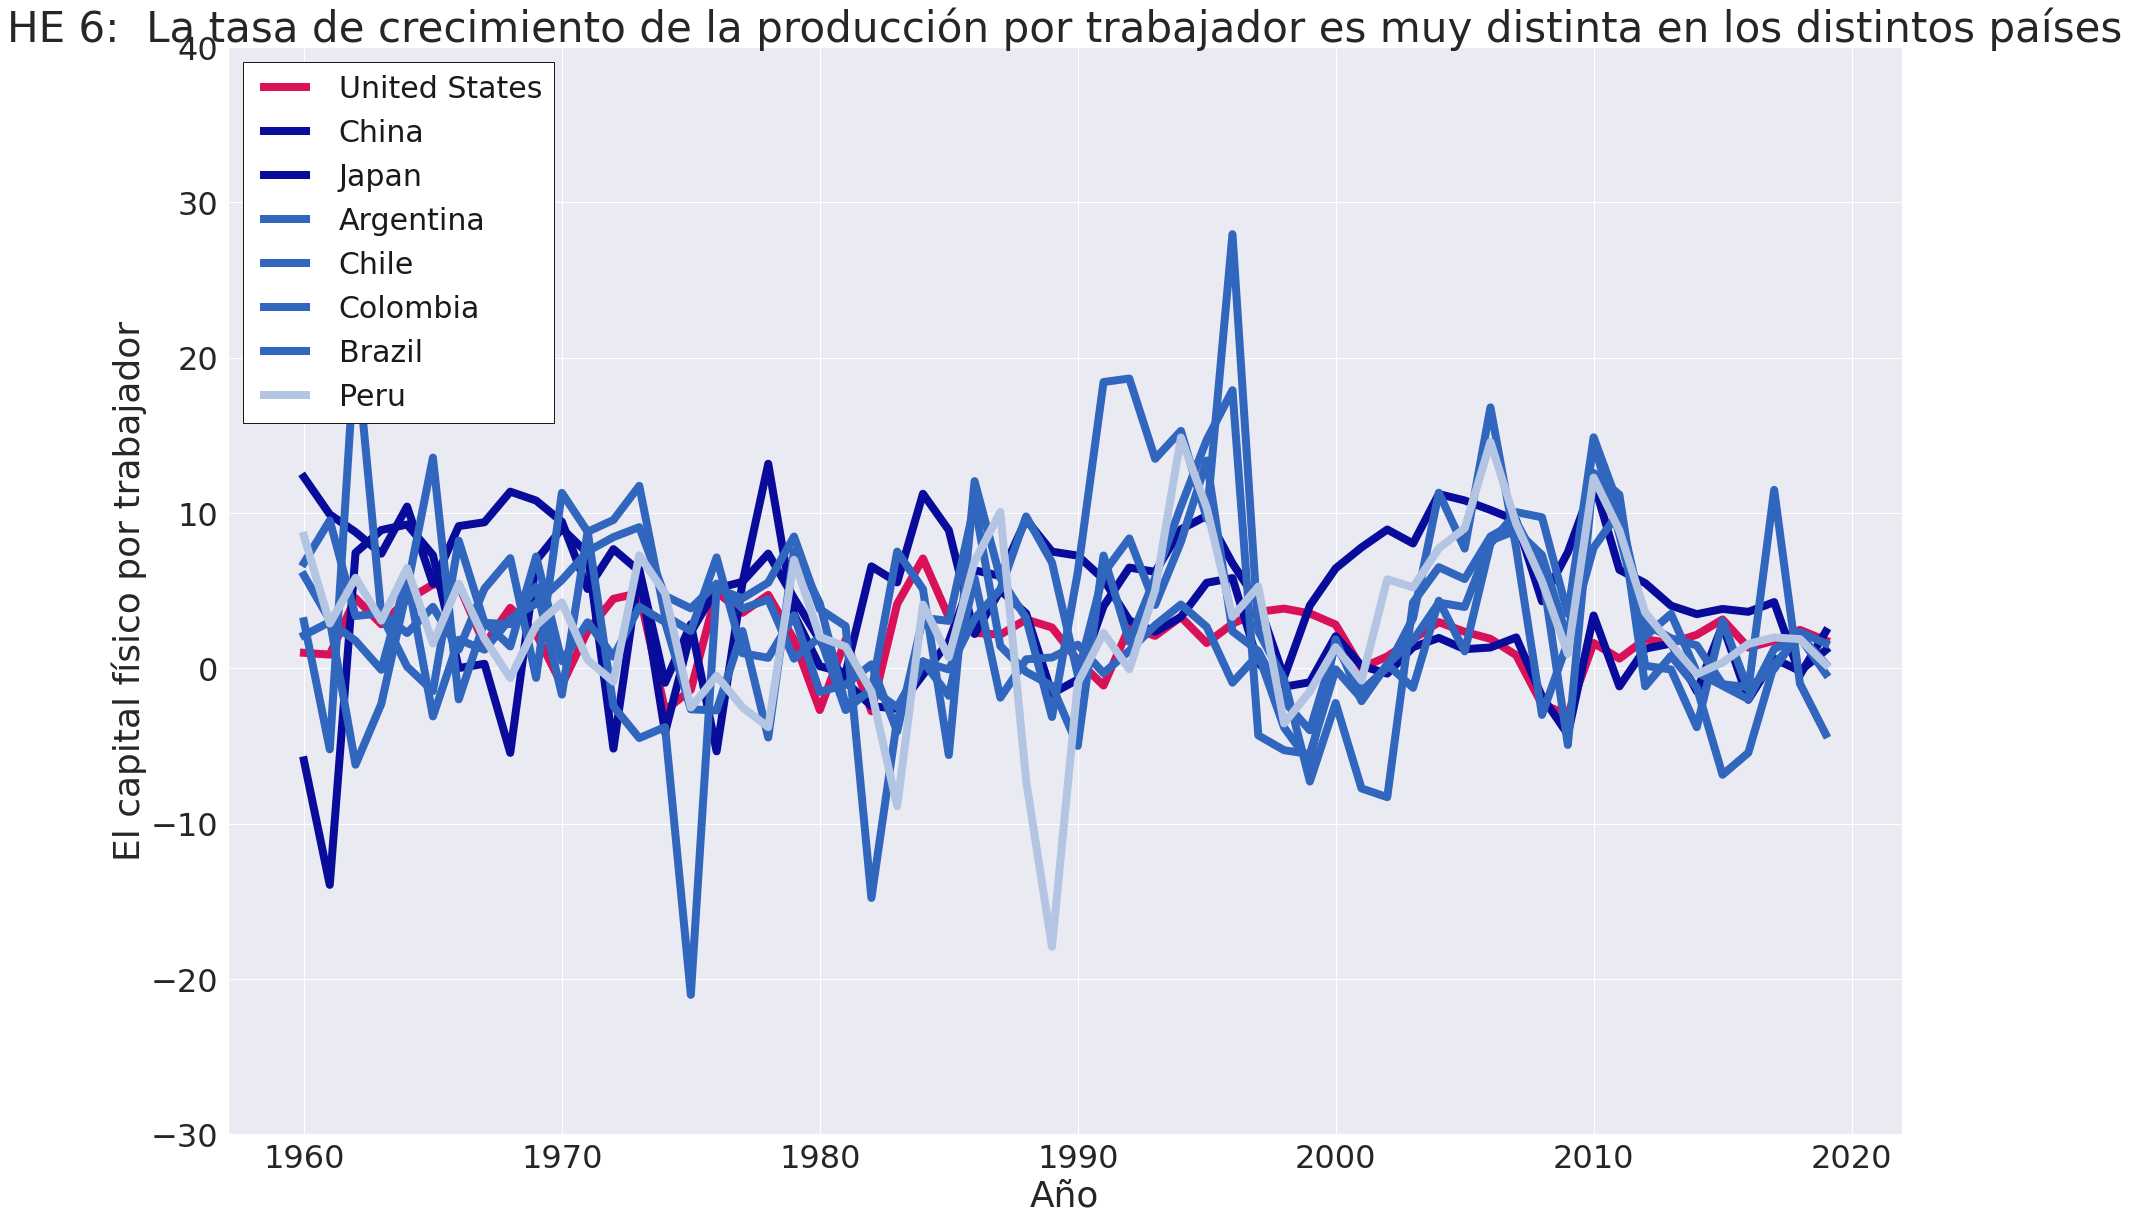

In [36]:
# Establecemos el tamaño de la figura
fig, ax = plt.subplots(figsize=(30,20))

# Etiquetamos los ejes
ax.set_title('HE 6:  La tasa de crecimiento de la producción por trabajador es muy distinta en los distintos países', fontsize = 42)
ax.set_xlabel('Año', fontsize = 36)
ax.set_ylabel('El capital físico por trabajador', fontsize = 36)
ax.tick_params(axis = 'both', which = 'major', labelsize = 32)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

# Ploteamos
with plt.style.context('classic'):
    plt.plot(df_growth_rate_gdp_pw['United States'], color = "#d81159", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['China'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Japan'], color = "#090c9b", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Argentina'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Chile'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Colombia'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Brazil'], color = "#3066be", linewidth=8)
    plt.plot(df_growth_rate_gdp_pw['Peru'], color="#b4c5e4", linewidth=8)
    # Leyenda
    plt.legend(['United States', 'China', 'Japan', 'Argentina', 'Chile', 'Colombia', 'Brazil', 'Peru'], loc='upper left', fontsize="30")
    plt.savefig(f"{out_dir_2}/{'h6.pdf'}", dpi=300, bbox_inches='tight') # exportamos  en pdf
    plt.show()